# Differential evolution

In [10]:
from utilities.std_imports import *
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as so
from numpy.random import rand
import math
from numpy import exp, sqrt, pi, cos, e

### Classical functions for global optimization

#### Rosenbrock function 
Global minimum at [1,1]

$ f(x,y) = (a - x=)^2 + b(y- x^2)^2 $

In [2]:
X = 0.1 * np.arange(10)
so.rosen(X)

76.56

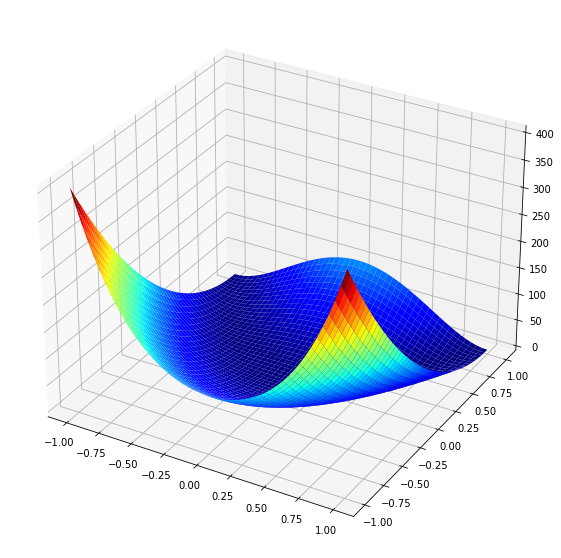

In [3]:
x = np.linspace(-1, 1, 50)
x, y = np.meshgrid(x, x)
fig = plt.figure(figsize=[20,10])
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, so.rosen([x, y]), cmap='jet');

#### DE optimization 

In [4]:
r_min, r_max = -5.0, 5.0
bounds = [[r_min, r_max], [r_min, r_max]]
res = so.differential_evolution(so.rosen, bounds)

print(res['message'])
print('Total Evaluations: ' , res['nfev'])

Optimization terminated successfully.
Total Evaluations:  3933


In [5]:
x_sol = res.x
y_sol = res.fun
print('Solution: f(', x_sol, ') = ' , y_sol)

Solution: f( [1. 1.] ) =  4.979684464207637e-30


### Ackley function
Global minimum at [0,0]

$ f(x,y) = -20 \exp[-0.2 \sqrt{0.5 (x^2+y^2)}] - \exp[0.5(\cos 2\pi x + \cos 2 \pi y)] + e + 20 $

In [14]:
def ackley(v):
    x, y = v
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

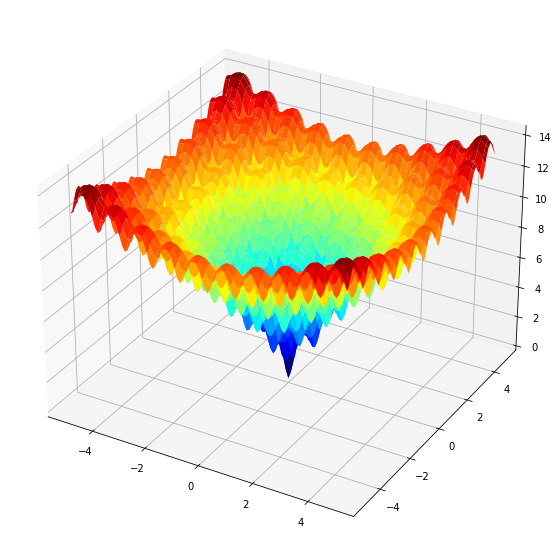

In [15]:
r_min, r_max = -5.0, 5.0
xs = np.arange(r_min, r_max, 0.1)
x, y = np.meshgrid(xs, xs)
res = ackley([x,y])

fig = plt.figure(figsize=[20,10])
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, ackley([x, y]), cmap='jet');

#### DE optimization 

In [72]:
bounds = [[r_min, r_max], [r_min, r_max]]
res = differential_evolution(ackleyV, bounds)

print(res['message'])
print('Total Evaluations: ' , res['nfev'])

Optimization terminated successfully.
Total Evaluations:  2943


In [73]:
x_sol = res['x']
y_sol = ackleyV(x_sol)
print('Solution: f(', x_sol, ') = ' , y_sol)

Solution: f( [0. 0.] ) =  0.0


### Links

https://en.wikipedia.org/wiki/Rosenbrock_function
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.rosen.html
https://www.cs.unm.edu/~neal.holts/dga/benchmarkFunction/ackley.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html